In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

aggregate = pd.read_csv('aggregate-Copy1.csv')
deaths = pd.read_csv('deaths-Copy1.csv')

# 1. Weapons with Most Number of Kills

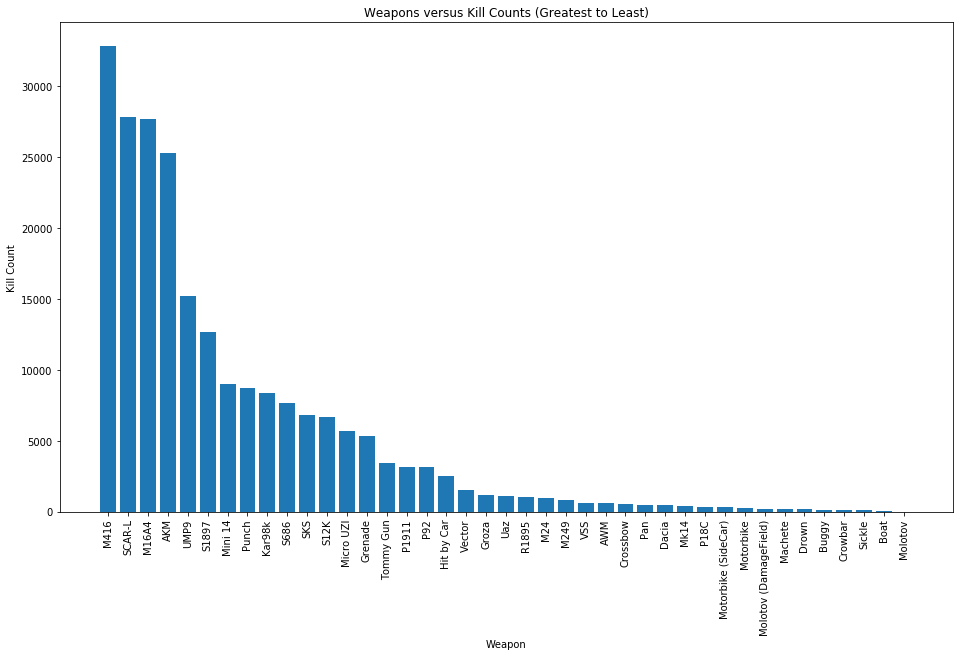

In [3]:
guns = deaths[['killed_by', 'killer_name']].groupby('killed_by').count()
guns = guns.sort_values('killer_name', ascending=False)
guns = guns.drop(['Down and Out', 'Falling', 'Bluezone', 'RedZone', 'death.Buff_FireDOT_C'], axis=0)
guns = guns.rename({'death.ProjMolotov_DamageField_C':'Molotov (DamageField)', 'death.ProjMolotov_C':'Molotov'}, axis='index')

_ = plt.rcParams["figure.figsize"] = [16,9]
_ = plt.bar(guns.index, guns['killer_name'])
_ = plt.xticks(rotation=90);
_ = plt.xlabel('Weapon')
_ = plt.ylabel('Kill Count')
_ = plt.title('Weapons versus Kill Counts (Greatest to Least)')

# 2. Distance Travelled versus Duration of Survival
## a. Overall Distance Travelled

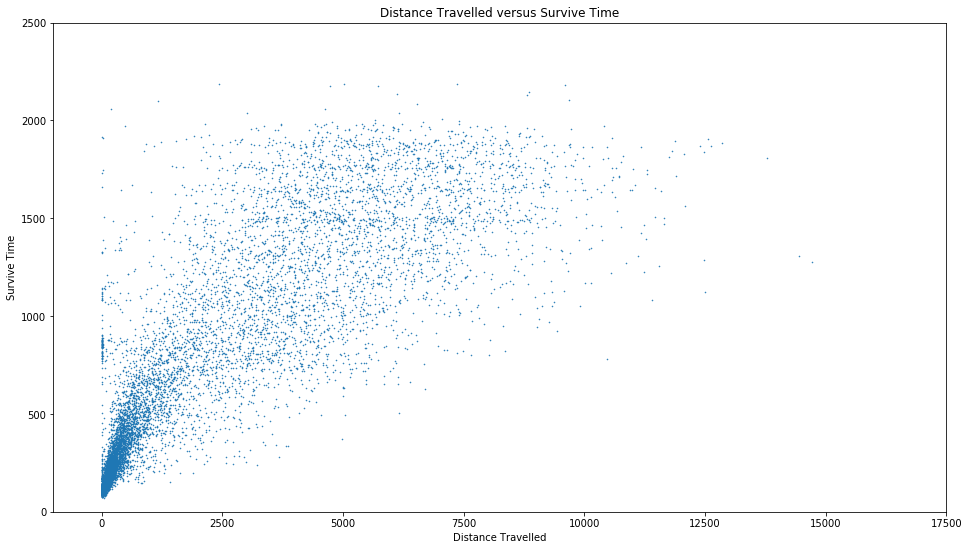

In [4]:
aggregate.head()

aggregate['dist_moved'] = aggregate['player_dist_ride'] + aggregate['player_dist_walk']
aggregate_filtered = aggregate.loc[aggregate['dist_moved'] < 20000]
three_perc = aggregate_filtered['date'].count()/33
aggregate_filtered = aggregate_filtered[['player_survive_time', 'dist_moved', 'player_dist_ride', 'player_dist_walk']].sample(int(three_perc))
_ = plt.scatter(aggregate_filtered['dist_moved'], aggregate_filtered['player_survive_time'], s=0.3)

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Distance Travelled')
_ = plt.ylabel('Survive Time')
_ = plt.title('Distance Travelled versus Survive Time')

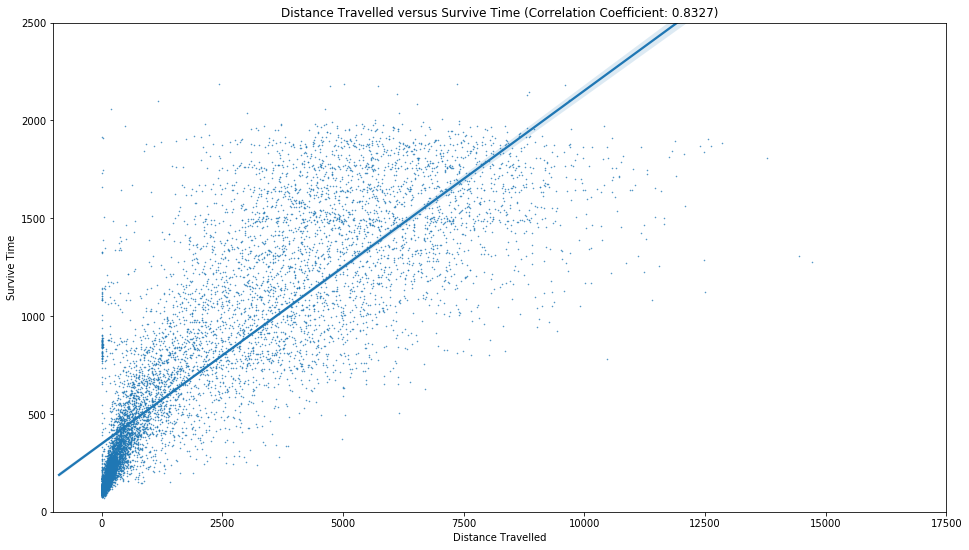

In [5]:
sns.regplot(x='dist_moved', y='player_survive_time', data=aggregate_filtered, fit_reg=True, scatter_kws={'s':0.3})
r = np.corrcoef(aggregate_filtered['dist_moved'], aggregate_filtered['player_survive_time'])[0][1]
r = np.round(r, 4)

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Distance Travelled')
_ = plt.ylabel('Survive Time')
_ = plt.title('Distance Travelled versus Survive Time (Correlation Coefficient: {0})'.format(r))

The data points are too concentrated for simple linear regression to explain the overall trend.

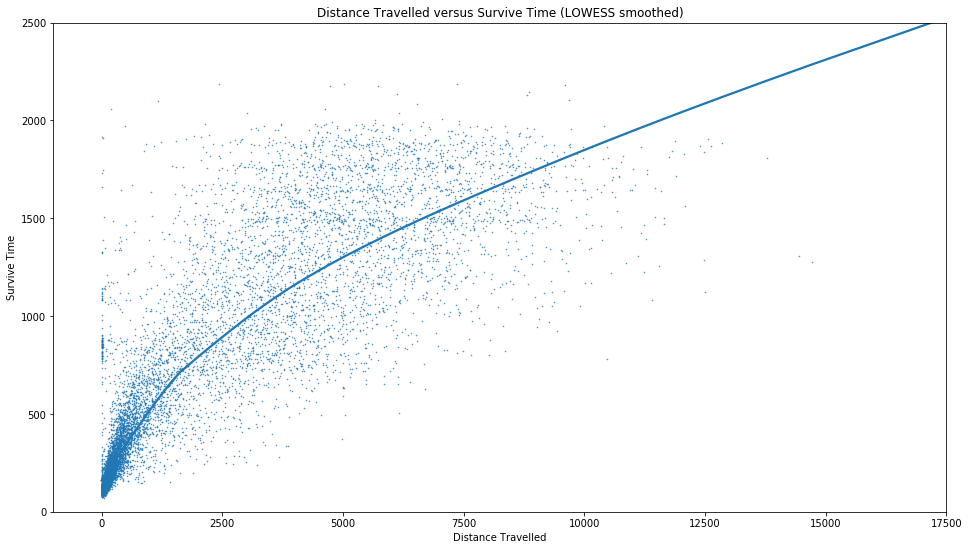

In [6]:
sns.regplot(x='dist_moved', y='player_survive_time', data=aggregate_filtered, lowess=True, scatter_kws={'s':0.3})

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Distance Travelled')
_ = plt.ylabel('Survive Time')
_ = plt.title('Distance Travelled versus Survive Time (LOWESS smoothed)')

## b. Distance Travelled in Vehicle

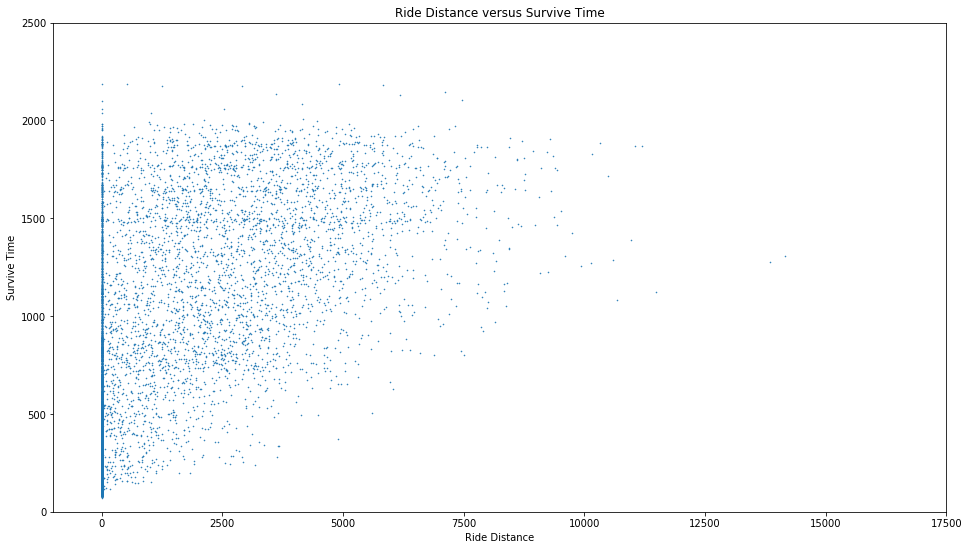

In [7]:
_ = plt.scatter(aggregate_filtered['player_dist_ride'], aggregate_filtered['player_survive_time'], s=0.3)

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Ride Distance')
_ = plt.ylabel('Survive Time')
_ = plt.title('Ride Distance versus Survive Time')

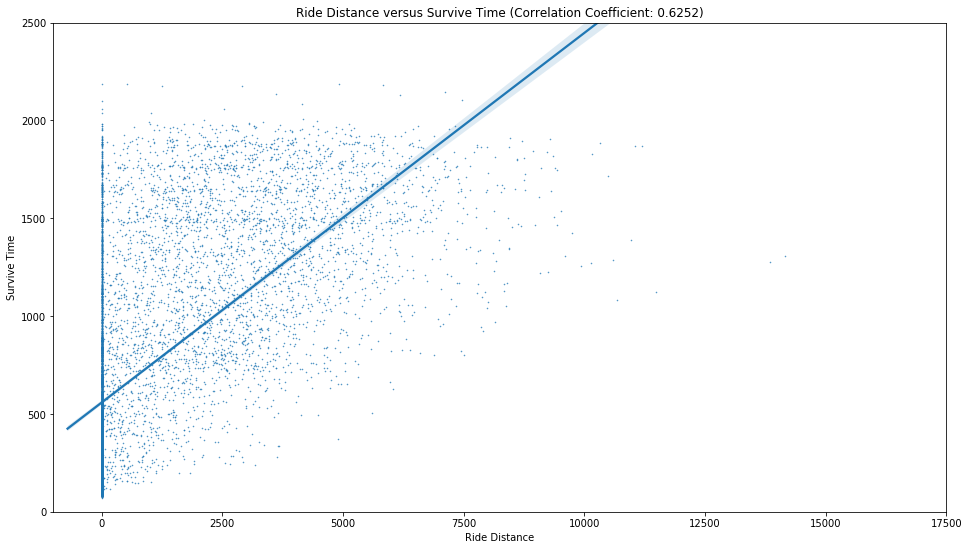

In [8]:
sns.regplot(x='player_dist_ride', y='player_survive_time', data=aggregate_filtered, fit_reg=True, scatter_kws={'s':0.3})
r = np.corrcoef(aggregate_filtered['player_dist_ride'], aggregate_filtered['player_survive_time'])[0][1]
r = np.round(r, 4)

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Ride Distance')
_ = plt.ylabel('Survive Time')
_ = plt.title('Ride Distance versus Survive Time (Correlation Coefficient: {0})'.format(r))

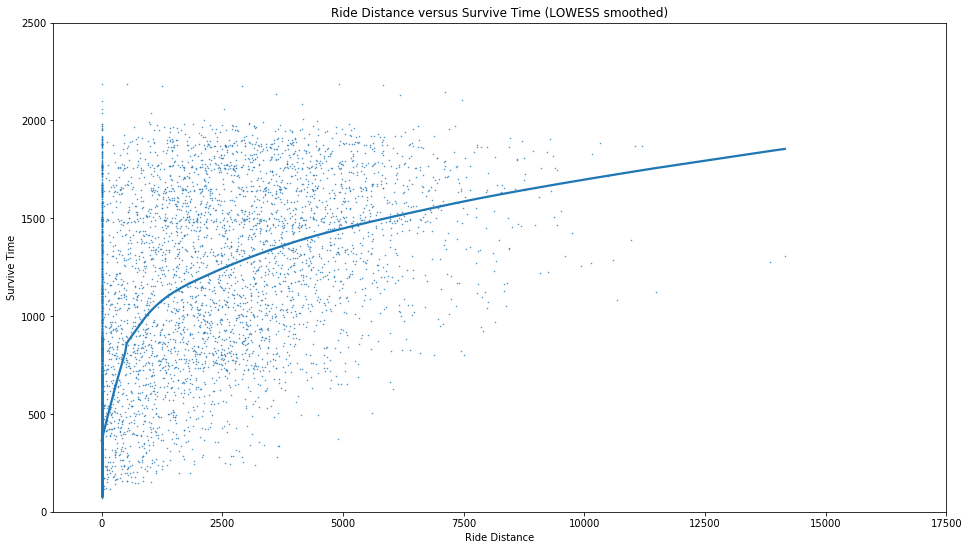

In [9]:
sns.regplot(x='player_dist_ride', y='player_survive_time', data=aggregate_filtered, lowess=True, scatter_kws={'s':0.3})

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Ride Distance')
_ = plt.ylabel('Survive Time')
_ = plt.title('Ride Distance versus Survive Time (LOWESS smoothed)')

## c. Distance Travelled on Foot

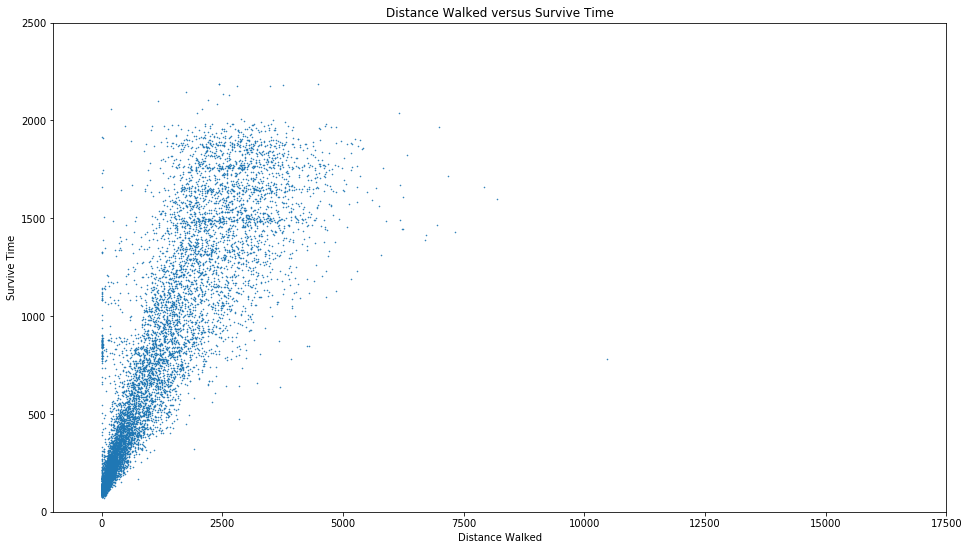

In [10]:
_ = plt.scatter(aggregate_filtered['player_dist_walk'], aggregate_filtered['player_survive_time'], s=0.3)

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Distance Walked')
_ = plt.ylabel('Survive Time')
_ = plt.title('Distance Walked versus Survive Time')

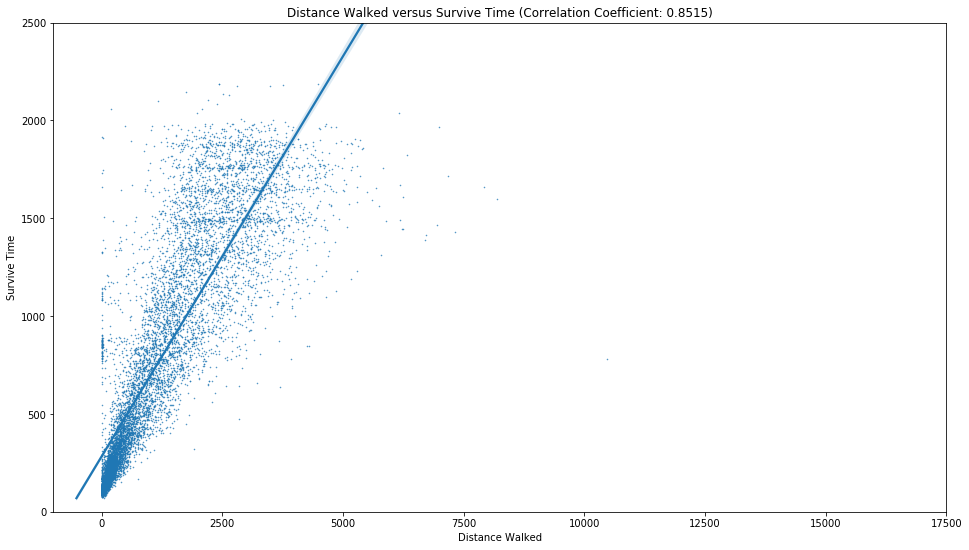

In [11]:
sns.regplot(x='player_dist_walk', y='player_survive_time', data=aggregate_filtered, fit_reg=True, scatter_kws={'s':0.3})
r = np.corrcoef(aggregate_filtered['player_dist_walk'], aggregate_filtered['player_survive_time'])[0][1]
r = np.round(r, 4)

_ = plt.ylim(0, 2500)
_ = plt.xlim(-1000, 17500)
_ = plt.xlabel('Distance Walked')
_ = plt.ylabel('Survive Time')
_ = plt.title('Distance Walked versus Survive Time (Correlation Coefficient: {0})'.format(r))

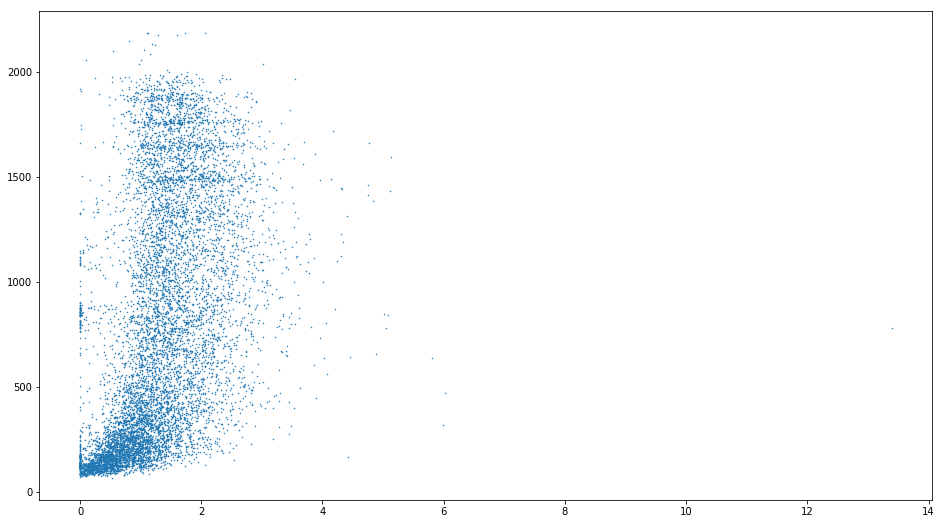

In [18]:
_ = plt.scatter(aggregate_filtered['player_dist_walk']/aggregate_filtered['player_survive_time'], aggregate_filtered['player_survive_time'], s=0.3)

In [12]:
aggregate.head()

,Unnamed: 0,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,dist_moved
0,74,2017-12-10 04:09:59+00:00,42,2U4GBNA0YmnIQQesqcucTHDFVqlXEAUiUHhJp3yec6c0hz...,tpp,2,1,1,659.240967,1721.58000,203,2,saver12138,904.900,2,21,2380.820967
1,75,2017-12-10 04:09:59+00:00,42,2U4GBNA0YmnIQQesqcucTHDFVqlXEAUiUHhJp3yec6c0hz...,tpp,2,0,0,642.757200,1889.31848,0,0,krisns,905.055,2,21,2532.075680
2,76,2017-12-10 04:09:59+00:00,42,2U4GBNA0YmnIQQesqcucTHDFVqlXEAUiUHhJp3yec6c0hz...,tpp,2,0,0,2277.785640,2347.73071,81,0,the49ersguy,1352.823,3,10,4625.516350
3,77,2017-12-10 04:09:59+00:00,42,2U4GBNA0YmnIQQesqcucTHDFVqlXEAUiUHhJp3yec6c0hz...,tpp,2,0,0,2281.096680,2420.64380,99,1,BIGSEX,1351.337,3,10,4701.740480
4,78,2017-12-10 04:09:59+00:00,42,2U4GBNA0YmnIQQesqcucTHDFVqlXEAUiUHhJp3yec6c0hz...,tpp,2,0,1,2652.308350,2374.72168,182,2,aLinqqqqq,1092.272,6,18,5027.030030


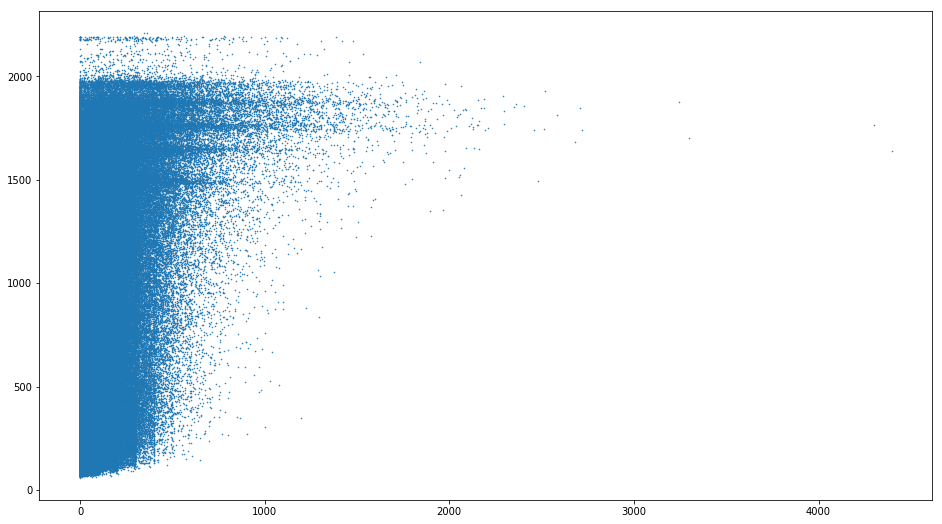

In [17]:
_ = plt.scatter(aggregate['player_dmg'], aggregate['player_survive_time'], s=0.3)


The following command must be run outside of the IPython shell:

    $ pip install folium

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
